In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

vehicles = pd.read_csv('vehicles.csv')

In [2]:
# add age column
vehicles['age'] = 2020 - vehicles['year'] #add an age column
# dropping a few columns for the sake of the project
vehicles.drop(['size', 'condition', 'VIN', 'paint_color'], inplace=True, axis=1)

In [3]:
pd.set_option('max_columns', None)

display(vehicles.tail(3))

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,image_url,description,state,lat,long,posting_date,age
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700,6.0
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,8 cylinders,gas,164000.0,clean,automatic,4wd,SUV,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700,12.0
458212,458212,7240562359,https://wyoming.craigslist.org/ctd/d/gilberts-...,wyoming,https://wyoming.craigslist.org,22900,2008.0,NaN,International 4300,NaN,diesel,164000.0,clean,automatic,NaN,NaN,https://images.craigslist.org/00k0k_77qSSp6sQC...,*** SHIPPING AVAILABLE DIRECTLY TO YOU. CALL F...,wy,42.117656,-88.436954,2020-12-02T12:03:45-0700,12.0


In [4]:
# missing values percentages in the dataset

missing = pd.DataFrame(vehicles.isnull().sum(), columns = ['sum_missing_values'])
missing = missing[missing['sum_missing_values']>0]
missing['Percentages'] = (missing['sum_missing_values']/len(vehicles))*100
missing = missing.sort_values(by=['sum_missing_values'], ascending=False)
missing

,sum_missing_values,Percentages
cylinders,171140,37.349442
drive,134188,29.285070
type,112738,24.603841
odometer,55303,12.069278
manufacturer,18220,3.976317
lat,7448,1.625445
long,7448,1.625445
model,4846,1.057587
fuel,3237,0.706440
title_status,2577,0.562402


In [4]:
display(vehicles.columns)

columns_mode = ['year', 'manufacturer', 'model', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'image_url', 'description', 'lat', 'long', 'posting_date']

# filling all missing values with the mode value
for i in columns_mode:
    vehicles[i] = vehicles[i].fillna(vehicles[i].mode()[0])

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'age'],
      dtype='object')

In [5]:
display(vehicles.isnull().sum())

Unnamed: 0         0
id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
cylinders          0
fuel               0
odometer           0
title_status       0
transmission       0
drive              0
type               0
image_url          0
description        0
state              0
lat                0
long               0
posting_date       0
age             1050
dtype: int64

In [7]:
#converting year from float to integer
vehicles['year'] = vehicles['year'].astype(int)

# converting posting_date from object to datetime
vehicles['posting_date'] = pd.to_datetime(vehicles['posting_date'], utc=True)

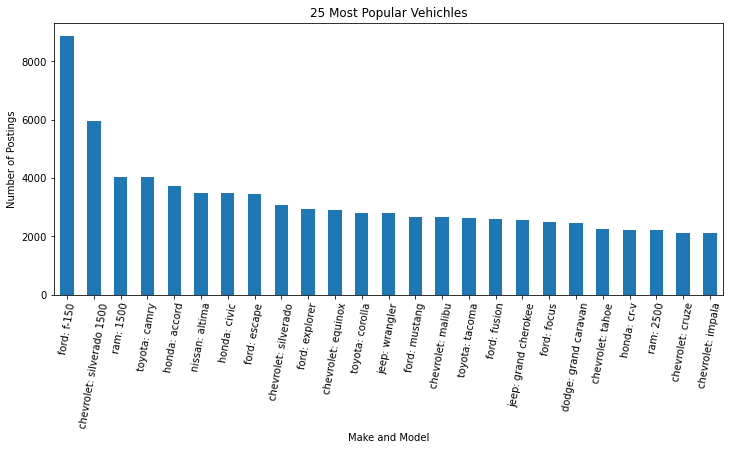

Index(['ford: f-150', 'chevrolet: silverado 1500', 'ram: 1500',
       'toyota: camry', 'honda: accord', 'nissan: altima', 'honda: civic',
       'ford: escape', 'chevrolet: silverado', 'ford: explorer',
       'chevrolet: equinox', 'toyota: corolla', 'jeep: wrangler',
       'ford: mustang', 'chevrolet: malibu', 'toyota: tacoma', 'ford: fusion',
       'jeep: grand cherokee', 'ford: focus', 'dodge: grand caravan',
       'chevrolet: tahoe', 'honda: cr-v', 'ram: 2500', 'chevrolet: cruze',
       'chevrolet: impala'],
      dtype='object')


In [7]:
#Take a look at the most popular vehicles for sale
vehicles['make_model'] = vehicles['manufacturer'] + ': ' + vehicles['model'] #add a column with the make and model in one string (for plotting)
com_cars = vehicles.make_model.value_counts()[:25]#the 25 most popular cars

#plot the results
fig = com_cars.plot.bar(figsize=(12,5))

plt.xlabel('Make and Model')
plt.ylabel('Number of Postings')
plt.title('25 Most Popular Vehichles')
plt.xticks(rotation=80)
plt.show()

print(com_cars.index)


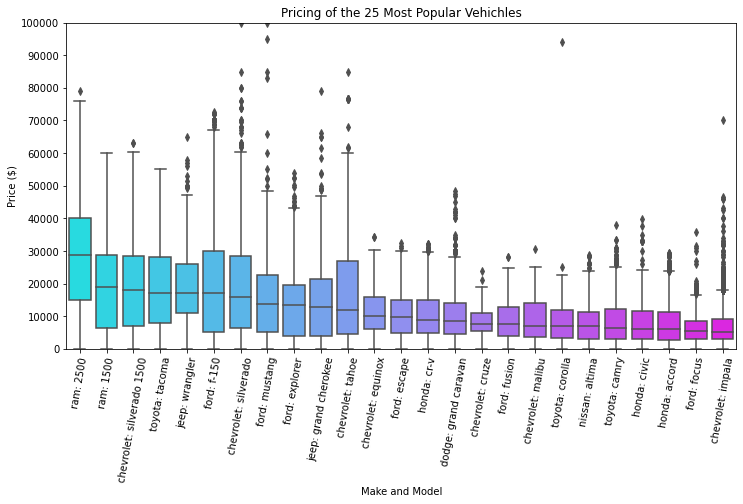

In [8]:
#plot the average prices of the 25 most popular cars
com_price = vehicles.loc[vehicles.make_model.isin(com_cars.index)]
ordered_labels = com_price.groupby('make_model').price.median().sort_values(ascending=False).index.values

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=com_price, x="make_model", y="price", order=ordered_labels, ax=ax, palette = 'cool')
plt.xticks(rotation = 80)
plt.yticks(range(0,int(1e7), int(1e4)))

plt.ylim(0,int(1e5))
plt.xlabel('Make and Model')
plt.ylabel('Price ($)')
plt.title('Pricing of the 25 Most Popular Vehichles')
plt.show()

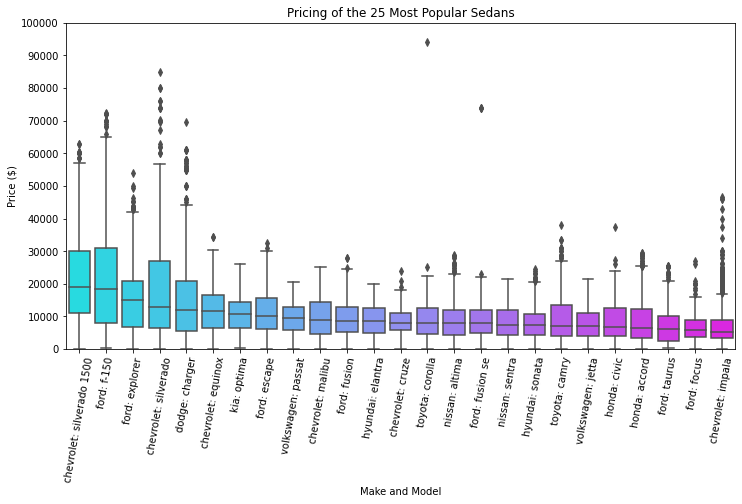

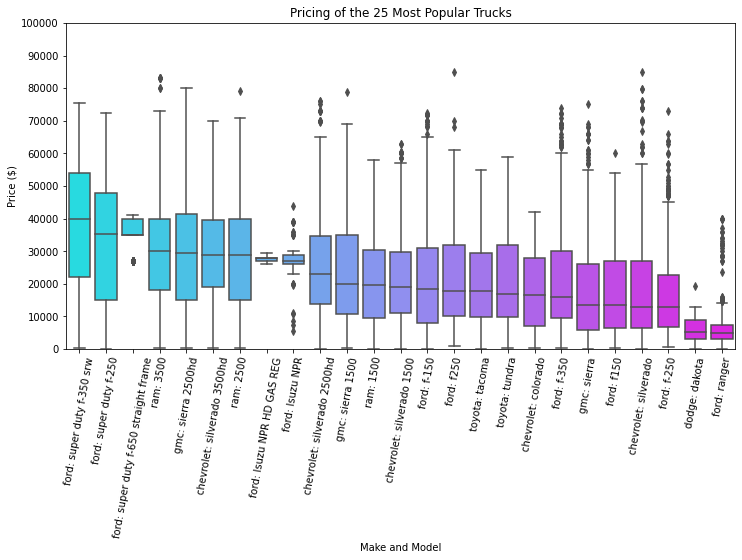

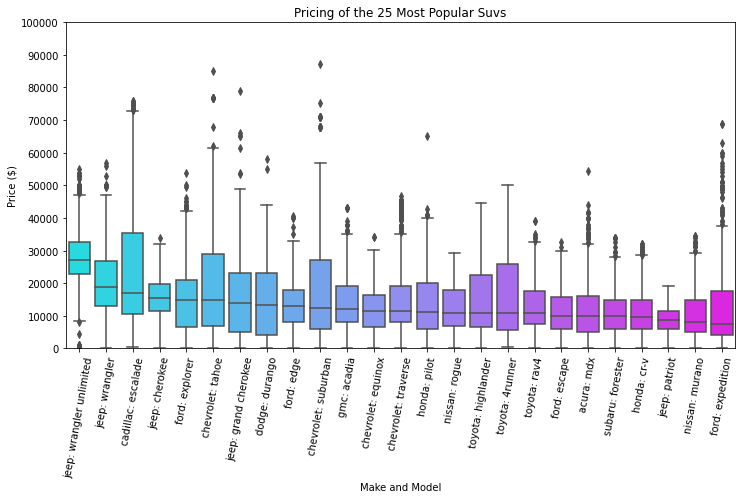

In [11]:
#plot the average prices of the 25 most popular trucks, trucks, and SUVS
for thing in ['sedan', 'truck', 'SUV']:
    com = cars[cars['type']==thing].make_model.value_counts()[0:25].index
    com_price = cars.loc[cars.make_model.isin(com)]
    ordered_labels = com_price.groupby('make_model').price.median().sort_values(ascending=False).index.values
    
    fig, ax = plt.subplots(figsize=(12,6))
    sns.boxplot(data=com_price, x="make_model", y="price", order=ordered_labels, ax=ax, palette = 'cool')
    plt.xticks(rotation = 80)
    plt.yticks(range(0,int(1e7), int(1e4)))

    plt.ylim(0,int(1e5))
    plt.xlabel('Make and Model')
    plt.ylabel('Price ($)')
    plt.title('Pricing of the 25 Most Popular {}s'.format(thing.capitalize()))
    plt.show()

### Depreciation of popular vehicles
When buying a car, you are not only interested in the current price, but the future price you might be able to sell it for. Here we will fit a decaying exponential function to individual model of vehicle to quantify the depreciation of that model over time. This will tell us if that model 'holds its value'.

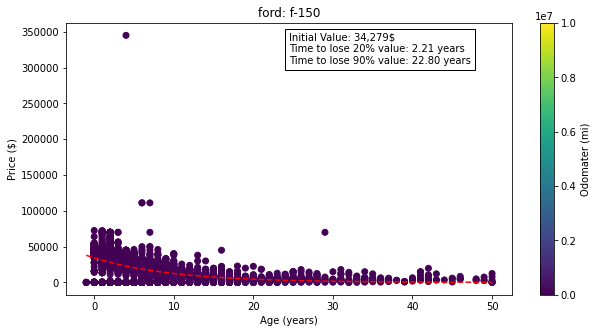

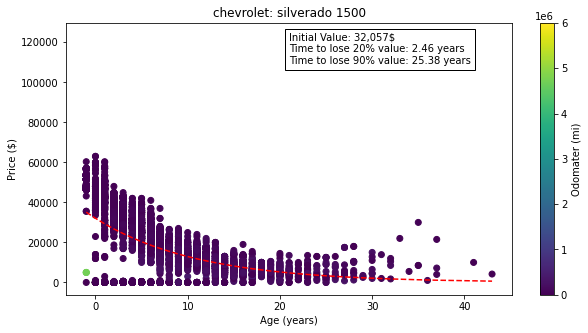

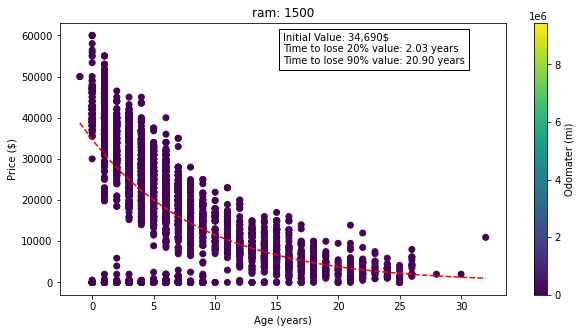

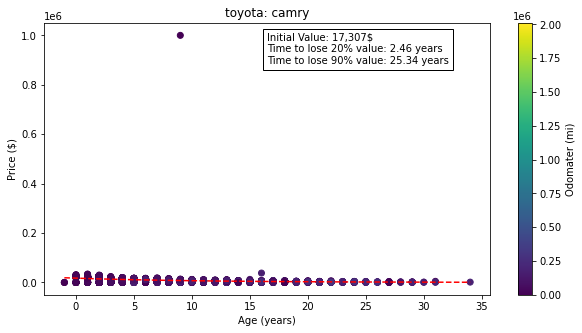

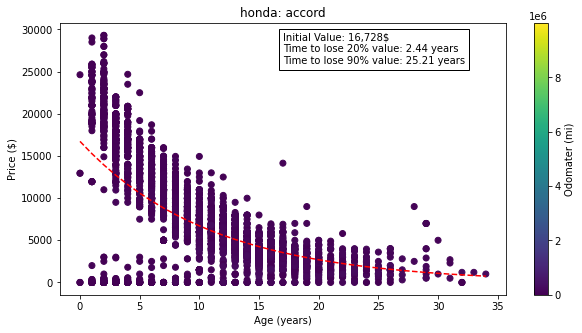

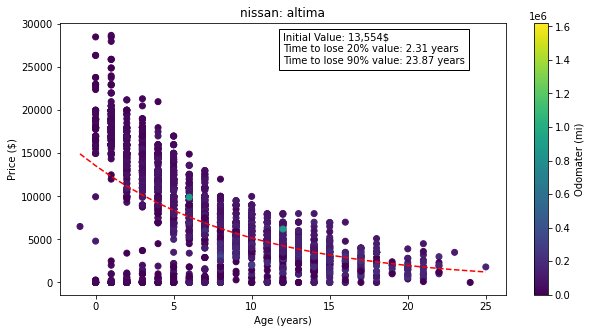

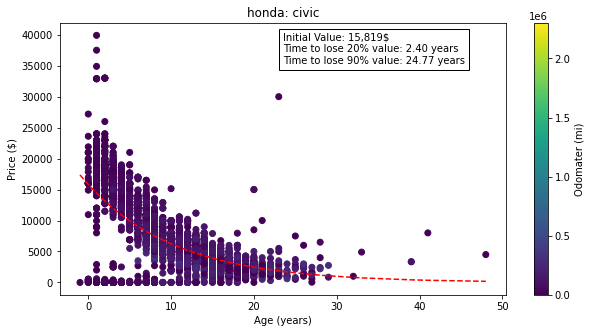

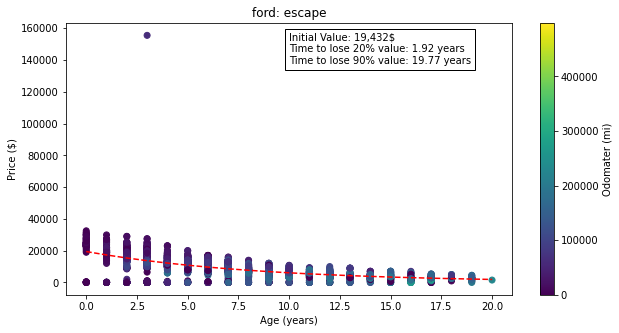

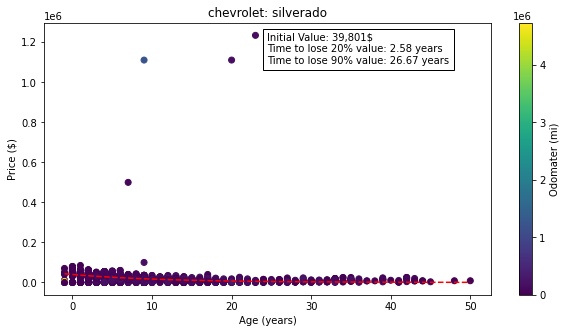

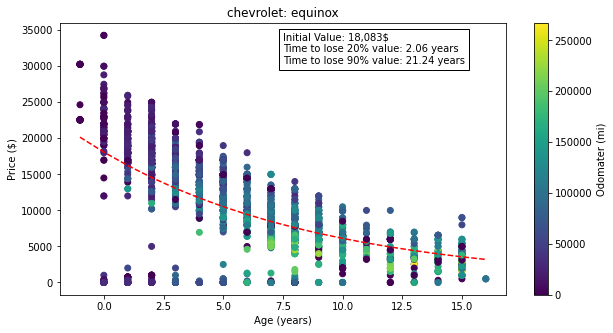

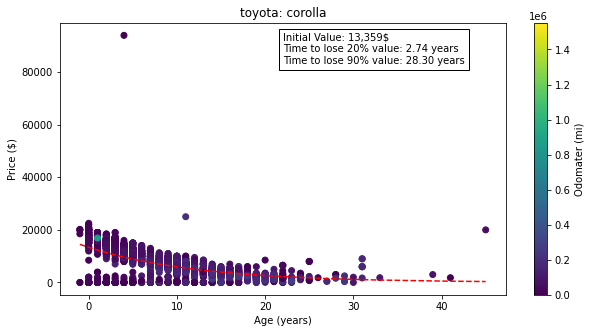

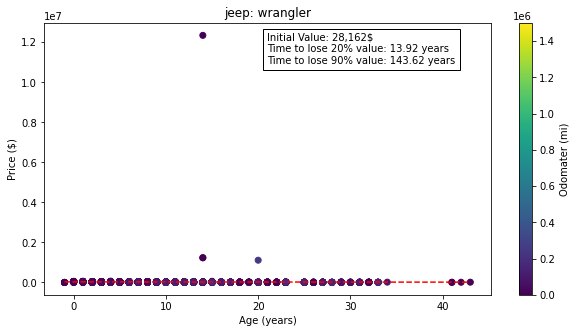

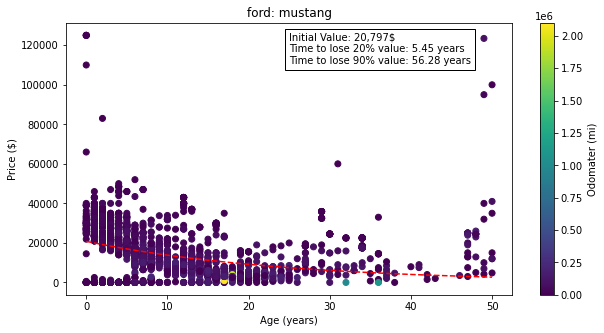

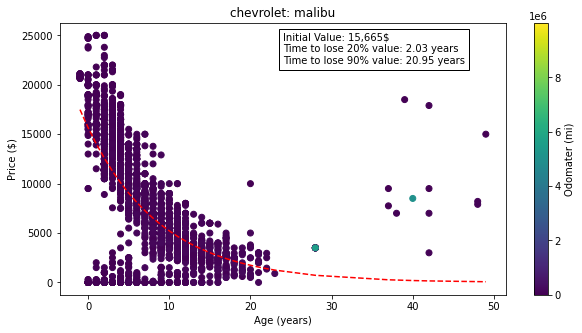

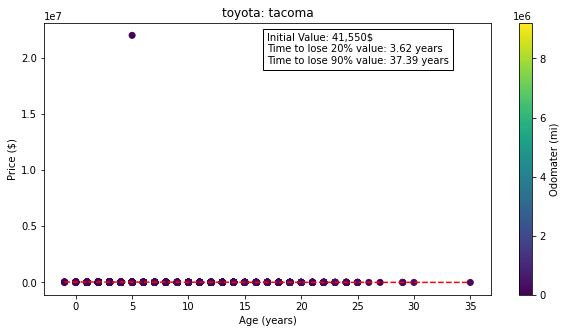

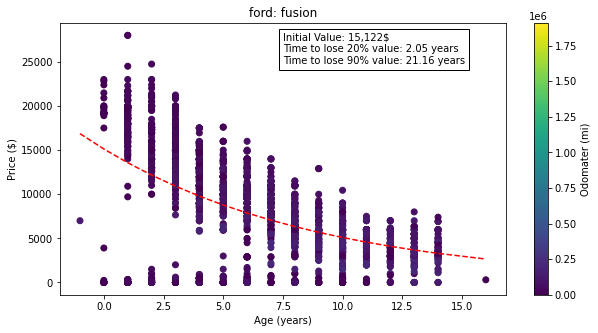

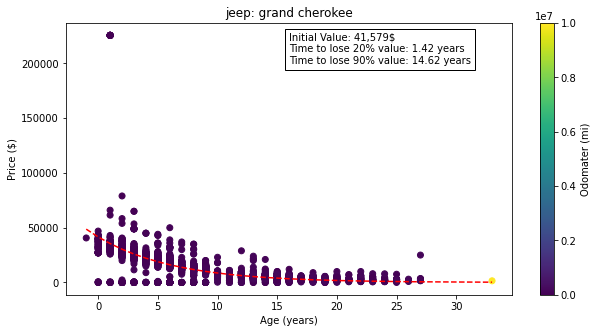

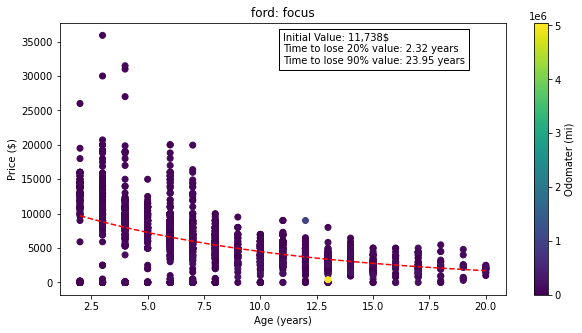

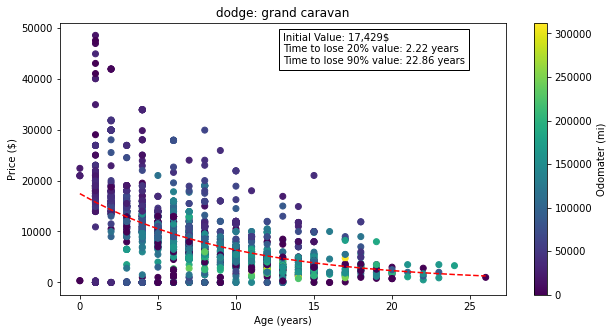

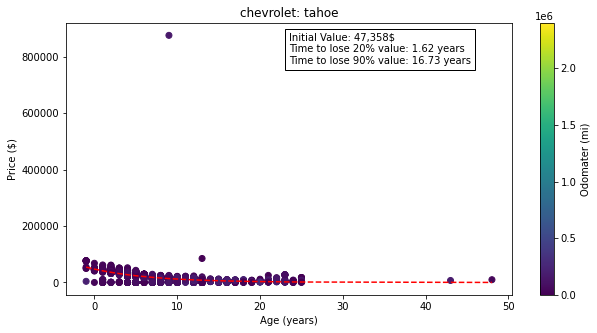

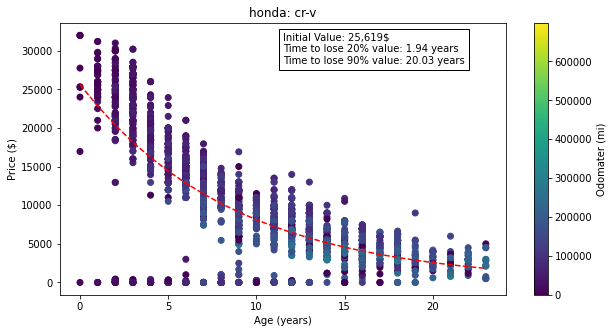

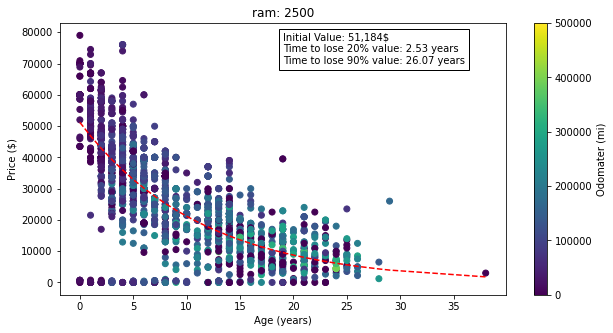

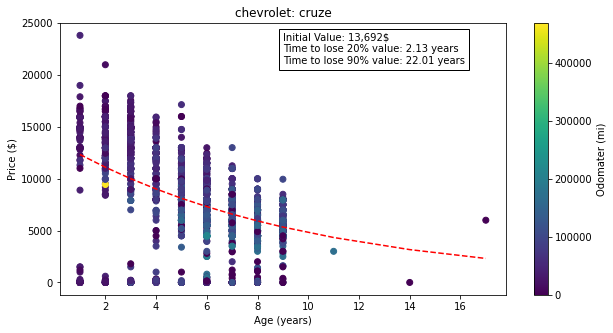

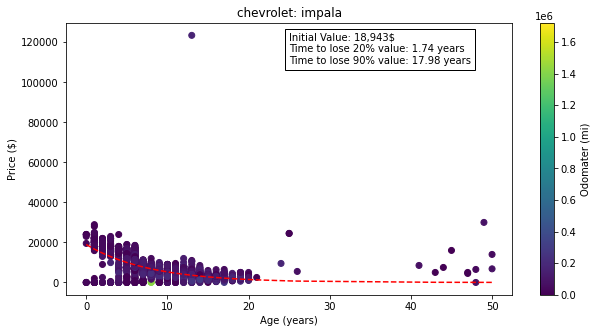

In [12]:
import numpy as np
#fit an exponential to the toyota corolla data to determine how well it holds its value
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b*x)#exponential function we will use to fit

def plot_depr(data, func, model):
    #get model data and filter out cars older than 50 years
    df = data[(data['make_model']==model) & (data['age']<=50)].sort_values(by='age')
    xdata = df['age']
    ydata = df['price']
    
    #fit to the data
    popt, _ = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])#fit the exponential to the data
    init = popt[0]#intiial value (age=0) according to the curve fit
    depr20 = -np.log(0.80)/popt[1]#time to depreciate 20% according to the curve fit
    depr90 = -np.log(0.10)/popt[1]#time to depreciate 90% according to the curve fit
    
    fig, ax = plt.subplots(figsize=(10,5))
    carplt = ax.scatter(xdata, ydata, c=df['odometer'], cmap='viridis')#scatter plot of age vs price, colored by odometer    
    plt.plot(xdata, func(xdata, *popt), 'r--')#plot the fitted curve
    
    plt.text(0.5, 0.85, 
             'Initial Value: {:,.0f}$\n'
             'Time to lose 20% value: {:.2f} years\n'
             'Time to lose 90% value: {:.2f} years'.format(init, depr20, depr90),
             transform = ax.transAxes, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    cbar=plt.colorbar(carplt)
    cbar.set_label('Odomater (mi)')
    plt.xlabel('Age (years)')
    plt.ylabel('Price ($)')
    plt.title(model)
    plt.show()

cars_depr = ['ford: f-150', 'chevrolet: silverado 1500', 'ram: 1500',
       'toyota: camry', 'honda: accord', 'nissan: altima', 'honda: civic',
       'ford: escape', 'chevrolet: silverado', 
       'chevrolet: equinox', 'toyota: corolla', 'jeep: wrangler',
       'ford: mustang', 'chevrolet: malibu', 'toyota: tacoma', 'ford: fusion',
       'jeep: grand cherokee', 'ford: focus', 'dodge: grand caravan',
       'chevrolet: tahoe', 'honda: cr-v', 'ram: 2500', 'chevrolet: cruze',
       'chevrolet: impala']
for i in cars_depr:
  plot_depr(vehicles, func, i)

Many people say that Toyotas hold their value. Let us see if that is true in our dataset by calculating the median deprecition value for different vehicle manufacturers.

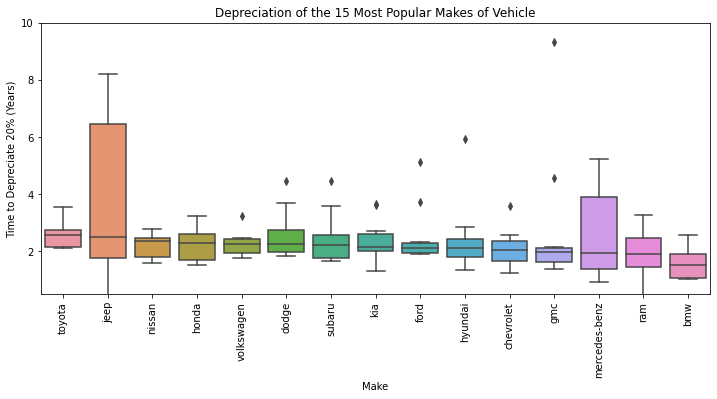

In [13]:
#Boxplot of deprecition for different manufactureers
makes = vehicles['manufacturer'].value_counts()[:15].index#15 most popular manufacturers
depr_df = pd.DataFrame(columns={'Make', 'Model', 'val0', 'depr20', 'depr90'})#this will hold the depreciation data
for make in makes:#loop over manufactureres
    com = vehicles[vehicles['manufacturer']==make].model.value_counts()[0:10].index #get the 10 most poopular models by the manufacturer
    for name in com:#look over the models
        df = vehicles[(vehicles['model']==name) & (vehicles['age']<50)].sort_values(by='age')#get data for the model for ages under 50
        xdata = df['age']
        ydata = df['price']  
        popt, pcov = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])#fit to the data

        init = popt[0]#initial value
        depr20 = -np.log(0.80)/popt[1]#time to depreciate 20%
        depr90 = -np.log(0.10)/popt[1]#time to depreciate 90%
        #append this data to the dataframe
        depr_df = depr_df.append({'Make':make, 'Model':name, 'val0':init, 'depr20':depr20, 'depr90':depr90}, ignore_index=True)

#order the data in terms of decreasing median depreciation time
order = depr_df.groupby('Make')['depr20'].median().sort_values(ascending=False).index

fig, ax=plt.subplots(figsize=(12,5))
sns.boxplot(data=depr_df, x='Make', y='depr20', order=order, ax=ax)
plt.title('Depreciation of the 15 Most Popular Makes of Vehicle')
plt.ylabel('Time to Depreciate 20% (Years)')
plt.ylim(0.5, 10)
plt.xticks(rotation=90)
plt.show()

So in the US, Jeeps and Rams hold their value the best. It seems folks like big 4wd vehicles. In the case of jeeps, some older models are highly sought after and can actually appreciate in value, which we might be seeing here. Toyotas also hold their value the well, with a median time of about 2.2 years for a vehicle to depreciate 20\%.

Use caution when interpreting this data due to the large variability within manufacturers. It is likely best to determine the depreciation value for the individual model in question when considering a purchase.

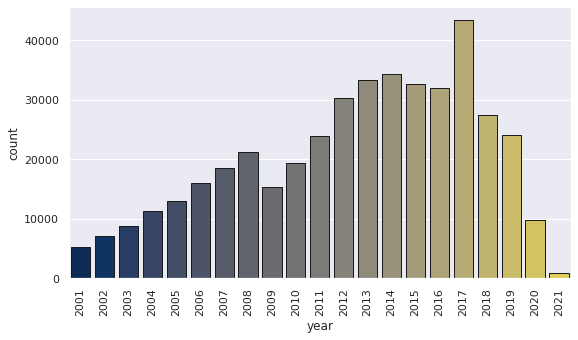

In [14]:
# YEAR
car = vehicles[vehicles.year > 2000]
plt.figure(figsize=(9,5))
sns.set_theme(style="darkgrid")
stat = sns.countplot(x="year", data=car, edgecolor = 'k', palette = 'cividis')
var = stat.set_xticklabels(stat.get_xticklabels(), rotation=90)

We can see from chart above that 2017 is the year with highest number of used car posted. That number decreased massively in 2020. The price of new car probably affect the decision to keep the old car.

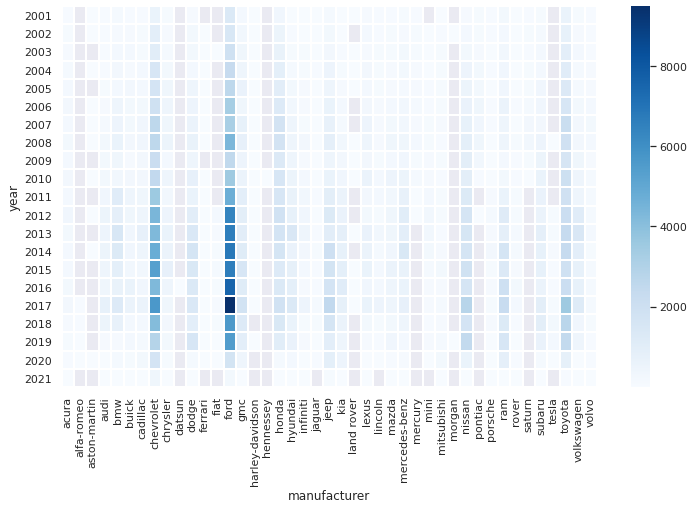

In [15]:
# MANUFACTURER WITH MOST POSTINGS OF USED CARS FOR SALE EACH YEAR

manf_ser = car.groupby('year').manufacturer.value_counts()
manf_ser_df = pd.DataFrame(manf_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(manf_ser_df, cmap='Blues', linecolor='white', linewidth=1)

Used cars from manufacturers like Ford, Chevrolet, and Toyota dominated for sale postings, especially in 2012 to 2018. Which means cars from those manufacturers are favourite among US people.


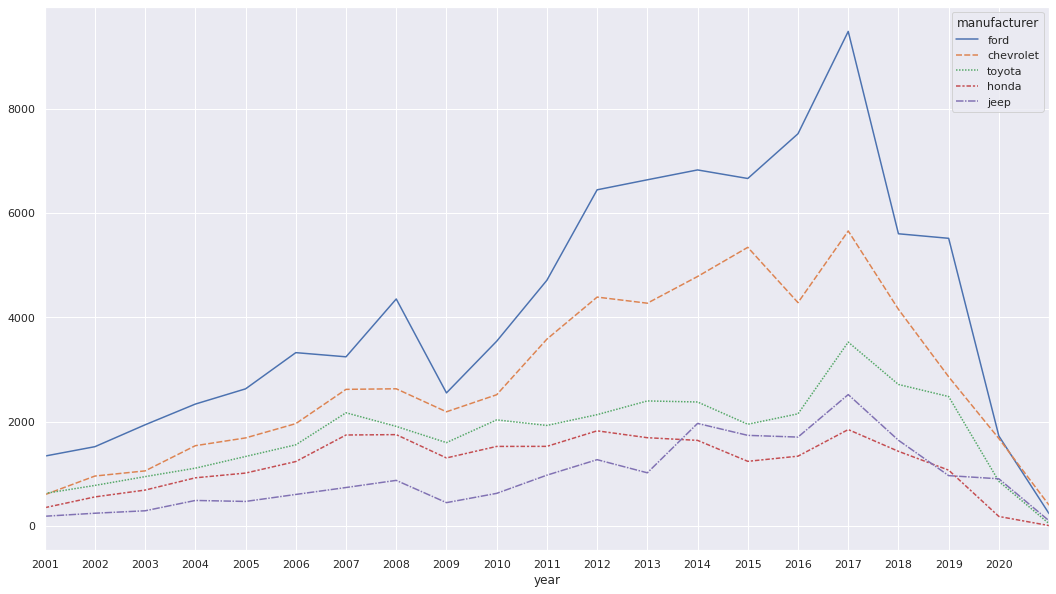

In [16]:
# TIME SERIES FOR FOR-SALE USED CARS EACH YEAR FROM TOP 5 MANUFACTURERS
cols = ['ford', 'chevrolet', 'toyota', 'honda','jeep']
manf_ser_df2 = manf_ser_df[cols].copy()

fig, ax = plt.subplots(figsize=(18, 10))
sns.lineplot(data=manf_ser_df2)
ax.set_xlim(2001,2021)
ax.set_xticks(range(2001,2021))
plt.show()

We can see the fluctuation of postings for each yeaar which Ford dominating almost every year

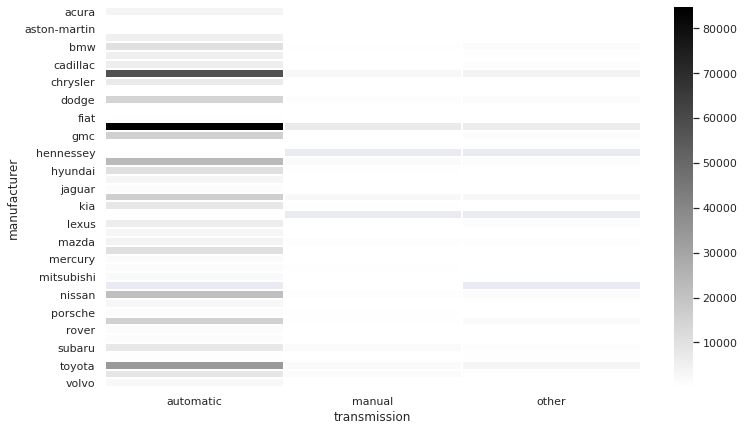

In [17]:
# TRANSMISSION TYPE

trans_ser = vehicles.groupby('manufacturer').transmission.value_counts()
trans_ser_df = pd.DataFrame(trans_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(trans_ser_df, cmap='binary', linecolor='white', linewidth=1)

Automatic used cars dominated the used cars market.

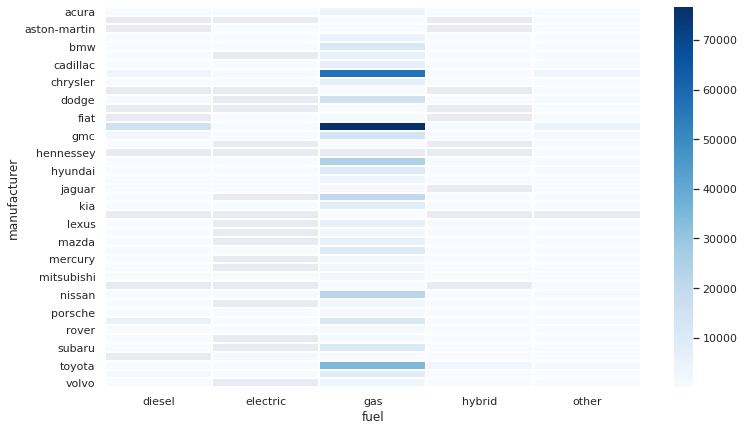

In [18]:
# FUEL

fuel_ser = vehicles.groupby('manufacturer').fuel.value_counts()
fuel_ser_df = pd.DataFrame(fuel_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(fuel_ser_df, cmap='Blues', linecolor='white', linewidth=1)

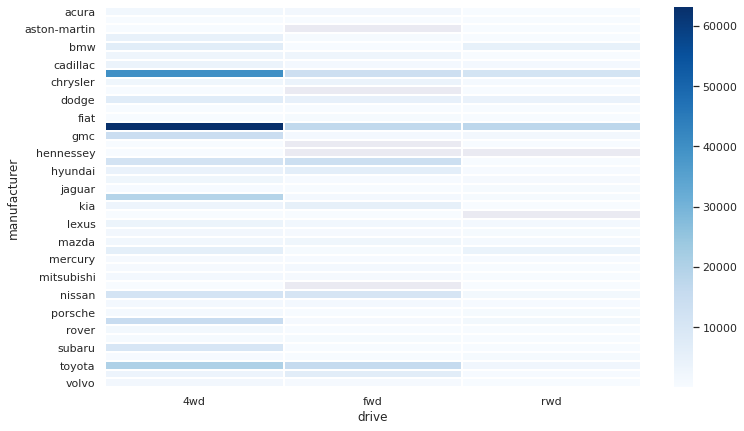

In [19]:
# DRIVE TYPE

drive_ser = vehicles.groupby('manufacturer').drive.value_counts()
drive_ser_df = pd.DataFrame(drive_ser.unstack())

plt.subplots(figsize=(12, 7))
sns.heatmap(drive_ser_df, cmap='Blues', linecolor='white', linewidth=1)

### Geographic distribution of vehicles


<Figure size 432x288 with 0 Axes>

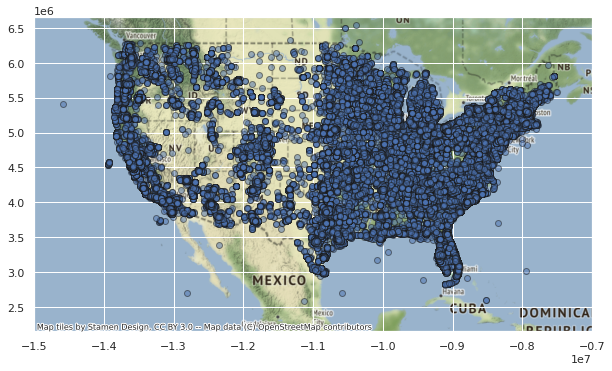

In [20]:
#map distribution of vehichles
plt.clf()
import geopandas as gpd
import contextily as ctx
gdf = gpd.GeoDataFrame(#convert the data to a geodataframe so it can be plotted on a map
    cars, geometry=gpd.points_from_xy(cars.long, cars.lat))
#remove data outside the geographic area of interest
gdf = gdf[(22<gdf.lat) & (gdf.lat<65) & (-144<gdf.long) & (gdf.long<-56)]
#tell geopandas what the coordinate system of our data is
gdf = gdf.set_crs(epsg=4326)#this is the latitude/longitude system the scraped data was in
gdf = gdf.to_crs(epsg=3857)#this is the coordinate system that the imported map is in

#plot the geographic area where data was collected and the points of the vehicles
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=4)
plt.xlim(-1.5e7,-0.7e7)
plt.ylim(2.15e6,6.65e6)
plt.show()

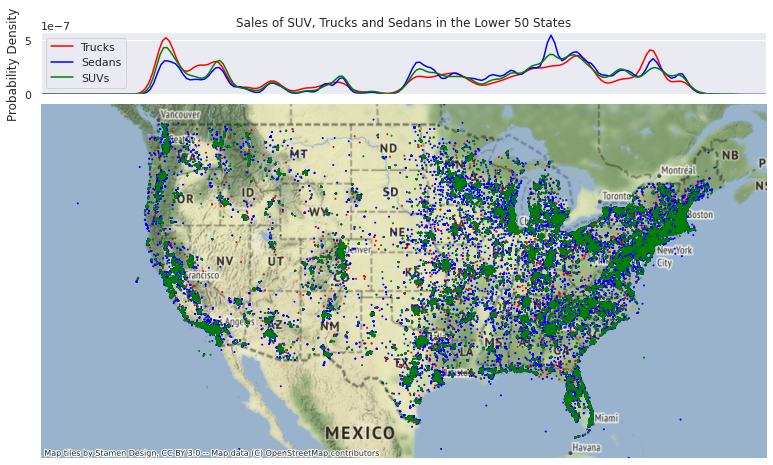

In [21]:
#plot the distribution of sedans, trucks, and suvs in the area around Vancouver
import geoplot
extent = (-1.5e7,-0.7e7, 2.6e6,6.5e6) #x and y limits of where we will plot

#look at sales of trucks, sedans, and SUVS
gtrucks = gdf[(gdf['type']=='truck')]
gsedans = gdf[(gdf['type']=='sedan')]
gsuvs = gdf[(gdf['type']=='SUV')]
#get the longitude data for each type of vehicle
trucks= pd.Series(gtrucks.geometry.x)
sedans= pd.Series(gsedans.geometry.x)
suvs= pd.Series(gsuvs.geometry.x)

fig, ax = plt.subplots(2, figsize=(13, 8), gridspec_kw={'height_ratios': [1, 6], 'hspace':0})
#plot the density distribution of each type by longitde
sns.kdeplot(data=trucks, ax=ax[0], clip=(extent[0], extent[1]), bw_adjust=0.35, label='Trucks', color='red')
sns.kdeplot(data=sedans, ax=ax[0], clip=(extent[0], extent[1]), bw_adjust=0.35, label='Sedans', color='blue')
sns.kdeplot(data=suvs, ax=ax[0], clip=(extent[0], extent[1]), bw_adjust=0.35, label='SUVs', color='green')
ax[0].set_xlim(extent[0], extent[1])#set the x limits of the plot to be the same as our map
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Sales of SUV, Trucks and Sedans in the Lower 50 States')
ax[0].set_xticks([])
ax[0].legend()

#Plot the location of each posting on a map
geoplot.pointplot(gtrucks, ax=ax[1], s=1, color='red')
geoplot.pointplot(gsedans, ax=ax[1], s=1, color='blue')
geoplot.pointplot(gsuvs, ax=ax[1], s=1, color='green')
ax[1].axis(extent)
ctx.add_basemap(ax[1], zoom=4)

plt.show()

The plot above shows the distribution of sedan, suv, and truck sales by owner in lower 48 states. The top probability density curves show the normalized distribution of each vehicle type over longitude. As expected, distinct peaks in all curves occur around population cennters.

Note that sedan and SUVs sales are almost exactly the same, again confirming that the SUV has become the 'daily driver' for many. Trucks deviate from the sedan/suv curves in the mid-west (perhaps in line with chicago) where there are slighly fewer, and the coasts where there are slightly more.

### Building a predictive model
##### Feature selection and preprocessing

In [22]:
feature_edit = vehicles.drop(columns=['Unnamed: 0', 'id', 'url', 'region_url', 'lat', 'long', 'posting_date', 'image_url', 'description', 'make_model', 'state', 'region', 'model'])

In [24]:
target = feature_edit['price']
features = feature_edit.drop(columns = ['price'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb



In [26]:
feature = pd.get_dummies(features)

In [20]:
columns = features.columns
for i in columns: 
    print(features[i].value_counts())

2017.0    43455
2014.0    34243
2013.0    33392
2015.0    32609
2016.0    31966
          ...  
1921.0        1
1913.0        1
1922.0        1
1910.0        1
1919.0        1
Name: year, Length: 110, dtype: int64
ford               97886
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn     

In [26]:
x_train, x_test, y_train, y_test = 

SyntaxError: ignored

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

xgb_predictions = xgb_model.predict(x_test)

In [ ]:
lgb_model = lgb.LGBMClassifier().fit(x_train, y_train)

lgb_predictions = lgb_model.predict(x_test)